# Loans Data Exploration
## by Mohamed Youssef

## Investigation Overview

> In this investigation, I'm most interested in figuring out Are there differences between loans depending on how large the original loan amount was? and What affects the borrower’s APR or interest rate.

## Dataset Overview

> This data set contains 84853 loans originated after July 2009. including loan amount, interest rate and many others.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('LoanData.csv')

In [28]:
# removing None values, and Occupation column because we already have EmploymentStatus column, and DebtToIncomeRatio, ListingCategory because they are not useful for us 
df = df[df.EmploymentStatusDuration.notnull()]
df.drop(columns=['Occupation', 'DebtToIncomeRatio', 'ListingCategory (numeric)'],  inplace=True)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      84834 non-null  int64  
 1   LoanStatus                84834 non-null  object 
 2   BorrowerAPR               84834 non-null  float64
 3   BorrowerRate              84834 non-null  float64
 4   LenderYield               84834 non-null  float64
 5   EstimatedReturn           84834 non-null  float64
 6   ProsperScore              84834 non-null  float64
 7   EmploymentStatus          84834 non-null  object 
 8   EmploymentStatusDuration  84834 non-null  float64
 9   IsBorrowerHomeowner       84834 non-null  bool   
 10  IncomeRange               84834 non-null  object 
 11  LoanOriginalAmount        84834 non-null  int64  
 12  MonthlyLoanPayment        84834 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 8.5

In [29]:
# convert EmploymentStatus into categorical types
Status = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired']
income = ['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

var = pd.api.types.CategoricalDtype(ordered = False,  categories = Status)
var2 = pd.api.types.CategoricalDtype(ordered = True,  categories = income)

df.EmploymentStatus = df.EmploymentStatus.astype(var)
df.IncomeRange = df.IncomeRange.astype(var2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      84834 non-null  int64   
 1   LoanStatus                84834 non-null  object  
 2   BorrowerAPR               84834 non-null  float64 
 3   BorrowerRate              84834 non-null  float64 
 4   LenderYield               84834 non-null  float64 
 5   EstimatedReturn           84834 non-null  float64 
 6   ProsperScore              84834 non-null  float64 
 7   EmploymentStatus          84834 non-null  category
 8   EmploymentStatusDuration  84834 non-null  float64 
 9   IsBorrowerHomeowner       84834 non-null  bool    
 10  IncomeRange               84789 non-null  category
 11  LoanOriginalAmount        84834 non-null  int64   
 12  MonthlyLoanPayment        84834 non-null  float64 
dtypes: bool(1), category(2), float64(7), int64(2),

## Borrower APR distribution

> I am starting by looking at the distribution of the main variables of interest: BorrowerAPR, The term “annual percentage rate (APR)” refers to the annual rate of interest charged to borrowers and paid to investors. 
BorrowerAPR is normally distributed, Interestingly, there's a jump in frequency right after 3.5, rather than a smooth up.

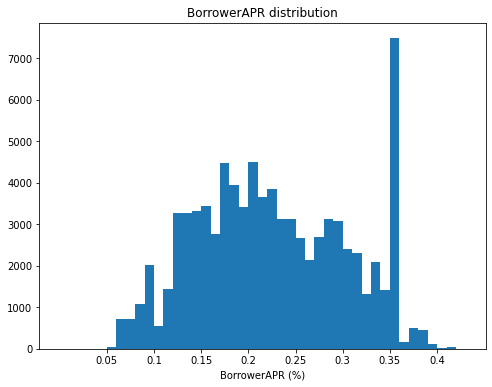

In [30]:
b_APR = np.arange(0,df.BorrowerAPR.max()+0.01,0.01)
ticks_APR = np.arange(0.05,df.BorrowerAPR.max(),0.05)
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
plt.hist(data=df, x='BorrowerAPR', color=base_color,bins=b_APR);
plt.xticks(ticks_APR,np.round(ticks_APR,2));

plt.title('BorrowerAPR distribution');
plt.xlabel('BorrowerAPR (%)');

## Monthly Loan Payment distribution

> Monthly Loan Payment plotted on a log-scale, the distribution looks normally distributed , there's a steep jump in Payment before 200 $

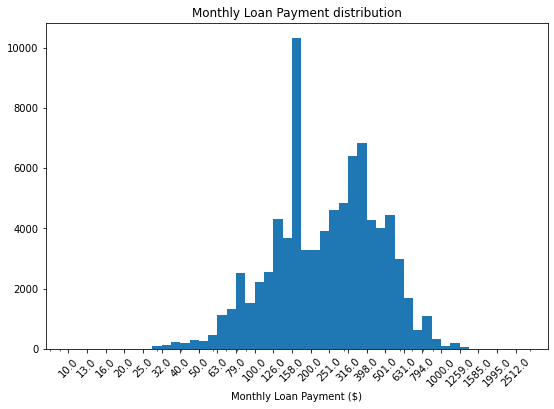

In [31]:
plt.figure(figsize = [9,6])
b_Month = 10 ** np.arange(1,3.5,0.05)
ticks_Month = 10 ** np.arange(1,3.5,0.1)
plt.hist(data=df, x='MonthlyLoanPayment', color=base_color, bins=b_Month);
plt.xscale('log');
plt.xticks(ticks_Month,np.round(ticks_Month), rotation=45);

plt.title('Monthly Loan Payment distribution');
plt.xlabel('Monthly Loan Payment ($)');

## Income Range distribution

>the ranges varies from 1-24,999(dollars) to 100,000(dollars),and we have Not employed Borrowers. 
we found that mid Ranges are the most frequent with Borrowers

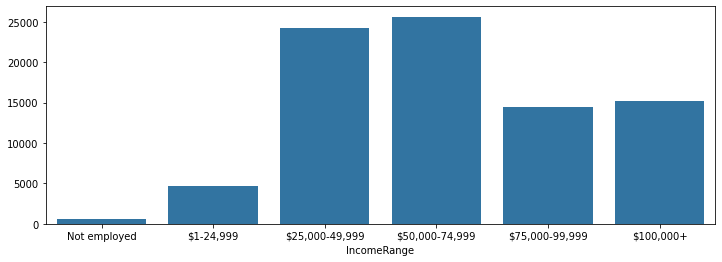

In [33]:
plt.figure(figsize = [12, 4])
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.xlabel('IncomeRange');
plt.ylabel('');

## BorrowerAPR vs. Income Range

> from the boxplot, it is observed that there is a negative relation with income range. we see that the more the income range is the less the mean of APR is.

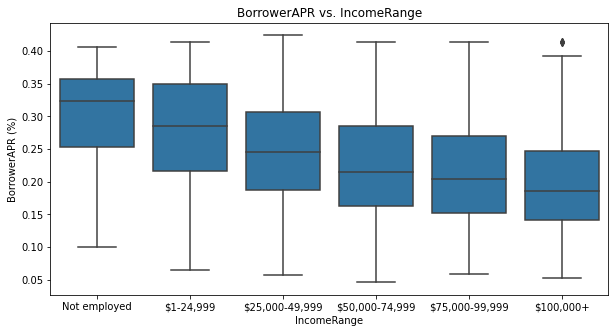

In [36]:
plt.figure(figsize = [10, 5])
sb.boxplot(data=df, x='IncomeRange', y='BorrowerAPR', color=base_color);

plt.title('BorrowerAPR vs. IncomeRange');
plt.xlabel('IncomeRange');
plt.ylabel('BorrowerAPR (%)');

## BorrowerAPR vs. Monthly Loan Payment

> Plotting BorrowerAPR and Monthly Loan Payment produces an approximat correlation. we can see that larger values of APR (0.3:0.4) tend to come with smaller values of Monthly Loan Payment. with large values of Monthly Loan Payment, the APR tends to be in a smaller range.

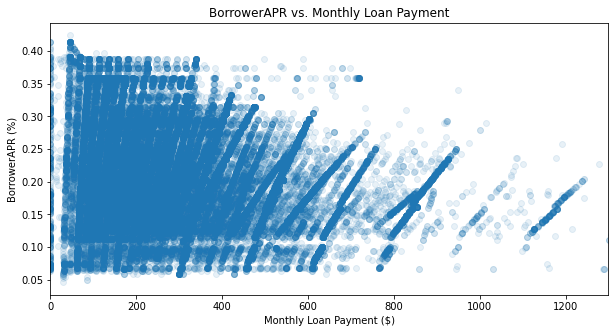

In [38]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df, x='MonthlyLoanPayment', y='BorrowerAPR', alpha=1/10);
#to exclude outliers
plt.xlim(0,1300);

plt.title('BorrowerAPR vs. Monthly Loan Payment');
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('BorrowerAPR (%)');

## BorrowerAPR vs. Monthly Loan Payment vs. IncomeRange

> I extended my investigation of BorrowerAPR against Loans in this section by looking at the impact of the three features. The multivariate exploration here showed that there indeed is a negative effect of increased MonthlyLoanPayment and BorrowerAPR.
from the plot, with an increase of income range we see an increase in ranges of MonthlyLoanPayment, which is logical because these values are negatively correlated with BorrowerAPR, which has a smaller range with the large values of the 2 variables.

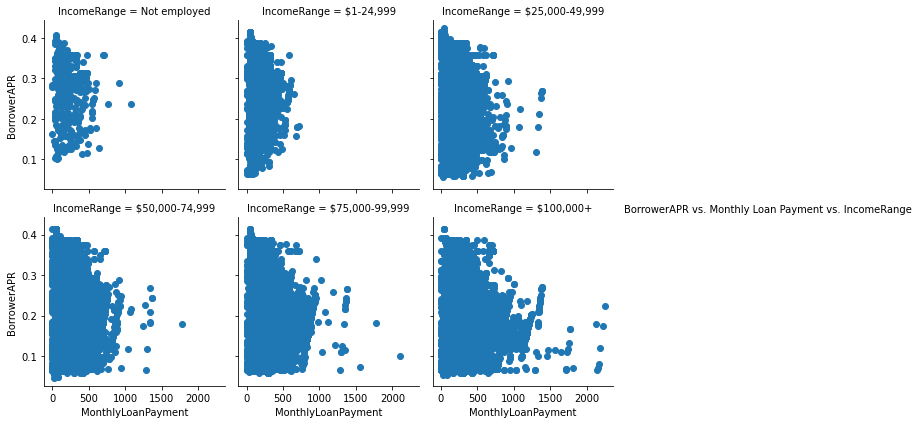

In [46]:
g = sb.FacetGrid(data = df, col = 'IncomeRange', palette = 'colorblind',margin_titles=True, col_wrap=3);
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR');
g.add_legend(title = 'BorrowerAPR vs. Monthly Loan Payment vs. IncomeRange');

## Income Range vs. Loan Original Amount vs. Is Borrower Home owner

> from this plot we see the positive effect of IncomeRange and IsBorrowerHomeowner on LoanOriginalAmount, house owners who earn +100K tends to borrow larger loans.

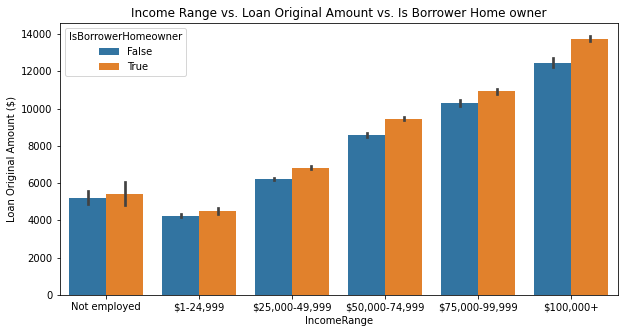

In [51]:
plt.figure(figsize = [10, 5])
sb.barplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');
plt.title('Income Range vs. Loan Original Amount vs. Is Borrower Home owner');
plt.xlabel('IncomeRange');
plt.ylabel('Loan Original Amount ($)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!